<a href="https://colab.research.google.com/github/Devulapally-hansika/word2vec/blob/main/p%2Bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving word2vec.txt to word2vec.txt


In [ ]:
with open('word2vec.txt', 'r') as file:
    word2vec = file.readlines()


print(word2vec)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a women can be queen\n', 'The prince is the strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'prince will be king\n', 'A boy will be man']


In [ ]:
for i in range(len(word2vec)):
    word2vec[i] = word2vec[i].lower().replace('\n', '')

print(word2vec)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a women can be queen', 'the prince is the strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be man']


In [ ]:
stopwords = ['the', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in word2vec:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['women', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [ ]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])

In [ ]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman', 'women']
Total number of unique words are: 13


In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11, 'women': 12}


In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
women : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [ ]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]
print(word_embeddings)

{'beautiful': array([0.89978  , 0.8941021], dtype=float32), 'boy': array([-1.2018231,  1.1986264], dtype=float32), 'daughter': array([0.99268466, 1.491215  ], dtype=float32), 'future': array([-0.73915994,  0.1261128 ], dtype=float32), 'king': array([-0.76256204,  0.80819166], dtype=float32), 'man': array([-0.95185196, -1.1461358 ], dtype=float32), 'prince': array([-1.2894143, -1.4162636], dtype=float32), 'princess': array([1.5556374 , 0.62581855], dtype=float32), 'queen': array([ 0.9998466, -0.5592691], dtype=float32), 'son': array([-0.9023913,  0.9382835], dtype=float32), 'strong': array([-0.5941188,  1.5981019], dtype=float32), 'woman': array([1.5283155, 1.0522312], dtype=float32), 'women': array([ 0.46250793, -1.5185859 ], dtype=float32)}


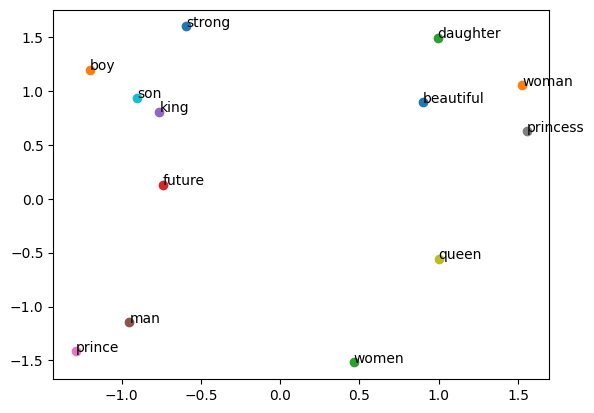

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
def positional_encoding(length, d_model):
    pos = np.arange(length)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(angle_rads, dtype=tf.float32)

In [ ]:
embed_size = X.shape[1]  # Already 2 from your code

X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
pos_enc = positional_encoding(X_tensor.shape[0], embed_size)
X_with_pos = X_tensor + pos_enc

In [ ]:
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.Wq = Dense(d_model)
        self.Wk = Dense(d_model)
        self.Wv = Dense(d_model)

    def call(self, x):
        Q = self.Wq(x)
        K = self.Wk(x)
        V = self.Wv(x)
        scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(tf.cast(d_model, tf.float32))
        weights = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(weights, V)

In [ ]:
d_model = embed_size  # 2, same as before
attn_layer = SelfAttention(d_model)

attn_output = attn_layer(tf.expand_dims(X_with_pos, 0))  # add batch dim
attn_output = tf.squeeze(attn_output)  # remove batch dim
attn_output = attn_output.numpy()

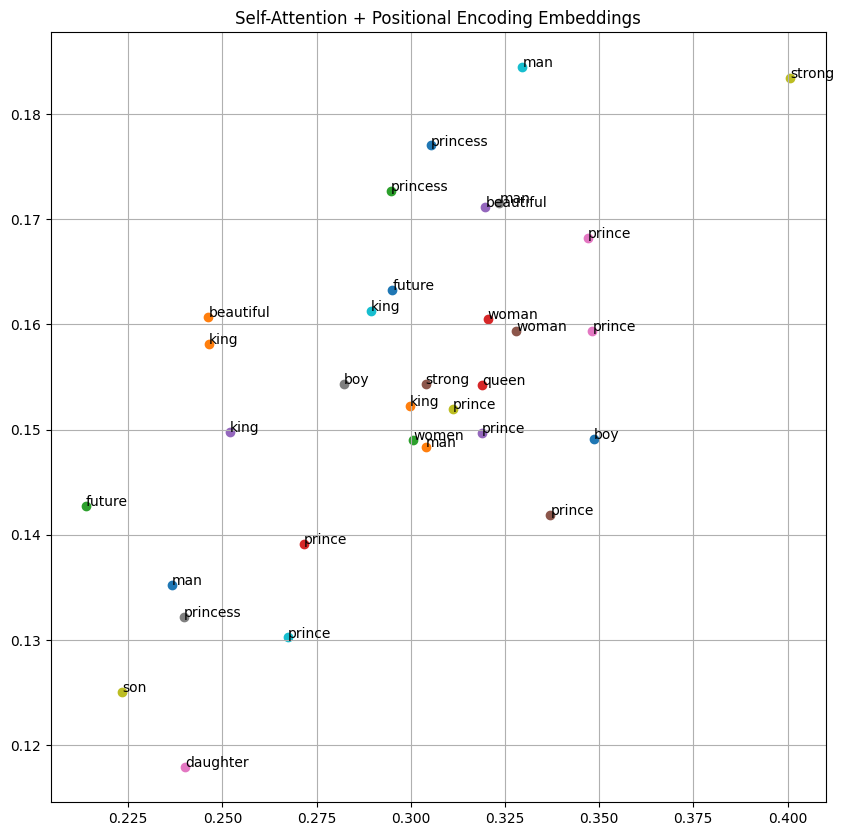

In [ ]:
plt.figure(figsize=(10, 10))

for i, word in enumerate([bi[0] for bi in bigrams]):
    plt.scatter(attn_output[i][0], attn_output[i][1])
    plt.annotate(word, (attn_output[i][0], attn_output[i][1]))

plt.title("Self-Attention + Positional Encoding Embeddings")
plt.grid(True)
plt.savefig("attention_positional.jpg")
plt.show()